In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import sonnet as snt
import numpy as np
from bnn.model_utils import *
import matplotlib.pyplot as plt
from cycler import cycler
from bnn.BNN_MLP import *
from bnn.utils import *
from copy import deepcopy
from tensorflow.examples.tutorials.mnist import input_data


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



Using TensorFlow backend.


In [3]:
X_holder = tf.placeholder(tf.float32, shape=[None, 784])
y_holder = tf.placeholder(tf.float32, shape=[None, 10])
num_batches = 468

In [4]:
net = BNN_MLP(n_inputs=784, n_outputs=10, hidden_units=[256, 256], init_mu=0.0, init_rho=-3.0, 
              activation=tf.nn.relu, last_activation=tf.nn.softmax)
#net.set_fisher_graph(X_holder,y_holder)
#out, log_probs, nll, kl_diver= net(X_holder, targets=y_holder, sample=True, n_samples=1, 
#                              loss_function=lambda y, y_target: 
#                                   tf.nn.softmax_cross_entropy_with_logits(labels=y_target, logits=y))

#net.set_vanilla_loss(log_probs,nll,num_batches)
#net.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [5]:
train_task,test_task = construct_permute_mnist(num_tasks=10)

In [6]:
sess = tf.InteractiveSession()
sess.run( tf.global_variables_initializer() )


KeyboardInterrupt: 

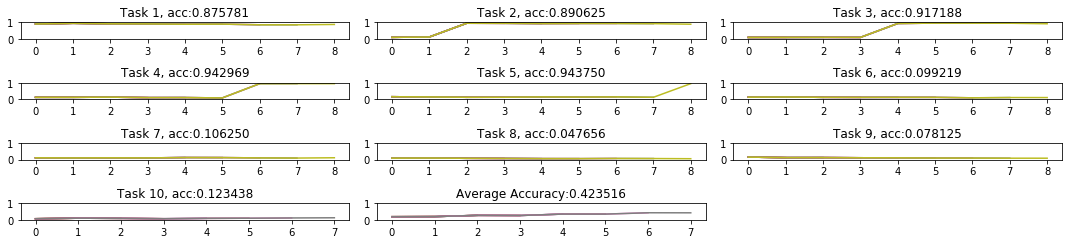

In [7]:
train_permute(net,sess,2,20,train_task,test_task,X_holder,y_holder,lams=[0])

In [ ]:
train_permute(net,sess,2,20,train_task,test_task,X_holder,y_holder,lams=[0.1])

In [ ]:
train_permute(net,sess,2,20,train_task,test_task,X_holder,y_holder,lams=[0.1],sequential=True)

In [ ]:
train_permute(net,sess,2,20,train_task,test_task,X_holder,y_holder,lams=[0.01],sequential=True)